In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from zlib import crc32

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import the Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/raw_house_data.csv')
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None


In [5]:
# Remove unnecassary comluns
not_needed = ['MLS','floor_covering', 'kitchen_features', 'fireplaces']
df = df.drop(not_needed, axis=1)
df

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,HOA
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,0
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,None
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,None
4,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,55
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,None
4996,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,43
4997,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,None
4998,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,None


In [6]:
# Rename the columns
df.columns = ['Price_of_House', 'Zip_Code', 'Longitude', 'Latitude', 'Lot_Size','Taxes', 'Year_Built', 'Bedrooms', 'Bathrooms', 'Square_Footage', 'Garage', 'HOA']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price_of_House  5000 non-null   float64
 1   Zip_Code        5000 non-null   int64  
 2   Longitude       5000 non-null   float64
 3   Latitude        5000 non-null   float64
 4   Lot_Size        4990 non-null   float64
 5   Taxes           5000 non-null   float64
 6   Year_Built      5000 non-null   int64  
 7   Bedrooms        5000 non-null   int64  
 8   Bathrooms       5000 non-null   object 
 9   Square_Footage  5000 non-null   object 
 10  Garage          5000 non-null   object 
 11  HOA             5000 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [8]:
df.describe()

,Price_of_House,Zip_Code,Longitude,Latitude,Lot_Size,Taxes,Year_Built,Bedrooms
count,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


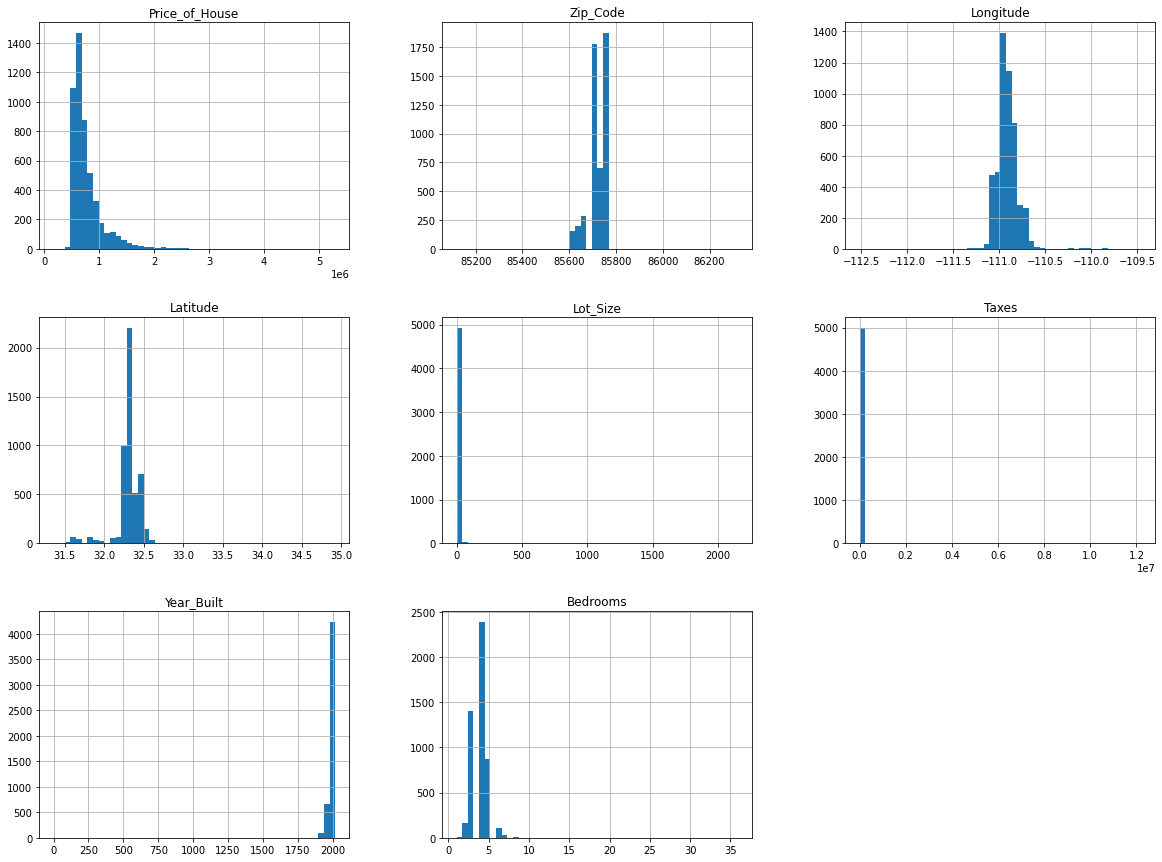

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# Check the types of the columns
df.dtypes

Price_of_House    float64
Zip_Code            int64
Longitude         float64
Latitude          float64
Lot_Size          float64
Taxes             float64
Year_Built          int64
Bedrooms            int64
Bathrooms          object
Square_Footage     object
Garage             object
HOA                object
dtype: object

In [11]:
# Look for the null values
df.isnull().sum()

Price_of_House     0
Zip_Code           0
Longitude          0
Latitude           0
Lot_Size          10
Taxes              0
Year_Built         0
Bedrooms           0
Bathrooms          0
Square_Footage     0
Garage             0
HOA                0
dtype: int64

In [12]:
# Check for all the None values in the columns

missing_values = {}
for missing in df.columns:
  none_values = df[df[missing] == 'None'].shape
  missing_values[missing]= none_values[0]
missing_values

{'Bathrooms': 6,
 'Bedrooms': 0,
 'Garage': 7,
 'HOA': 562,
 'Latitude': 0,
 'Longitude': 0,
 'Lot_Size': 0,
 'Price_of_House': 0,
 'Square_Footage': 56,
 'Taxes': 0,
 'Year_Built': 0,
 'Zip_Code': 0}

## Deal with missing values and None values

In [13]:
'''
Check how many none values
Check if values can be removed
Check the type of the column to see if it is correct
Check what the appropriate value is to replace with the None
'''
df[df['HOA'] == 'None'].shape
df[df.values == 'None']

,Price_of_House,Zip_Code,Longitude,Latitude,Lot_Size,Taxes,Year_Built,Bedrooms,Bathrooms,Square_Footage,Garage,HOA
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,None
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,None
2,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,None
3,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,None
10,2776518.0,85640,-111.045441,31.562121,147.18,7330.36,1935,5,5,5067,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,None
4997,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,None
4998,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,None
4999,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4,4,4317,None,None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43e60fa590>,
      dtype=object)

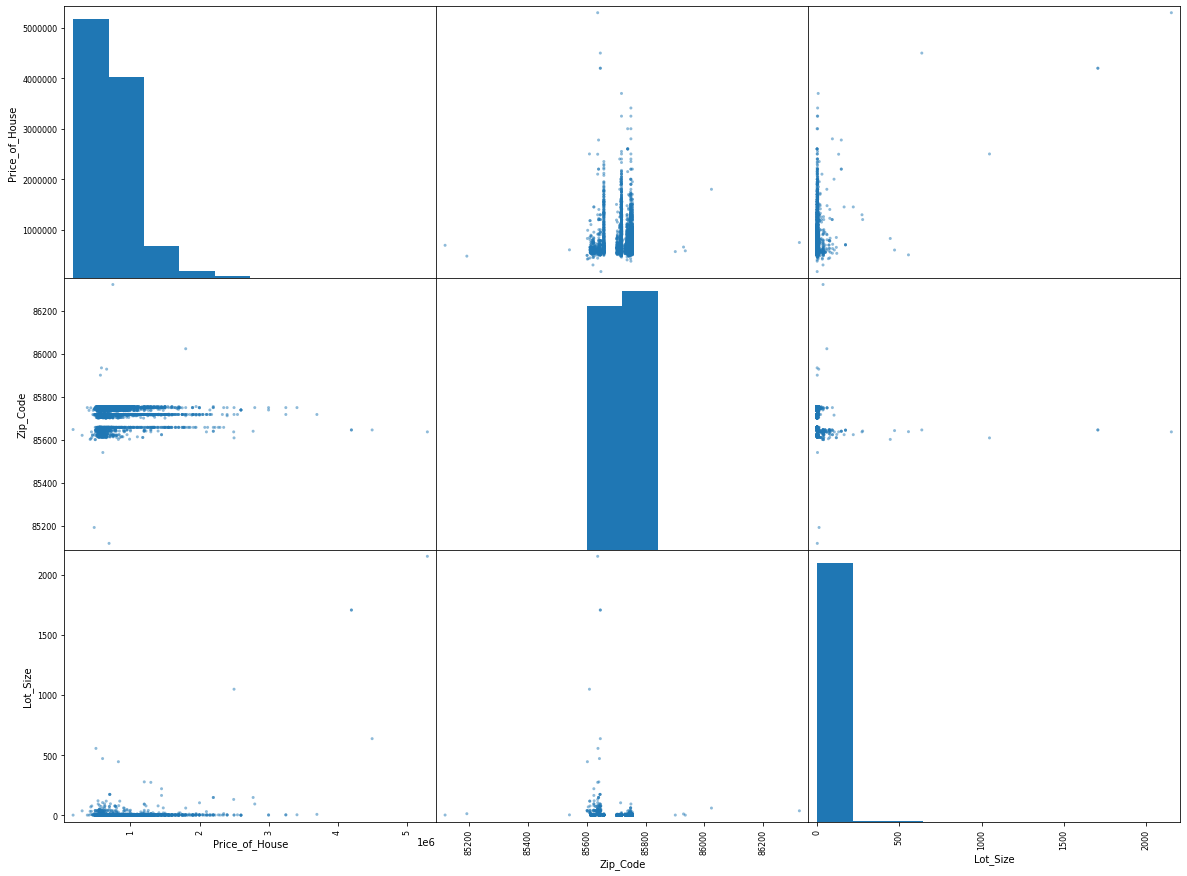

In [14]:
attributes = ['Price_of_House', 'Bathrooms', 'Zip_Code', 'Lot_Size']
scatter_matrix(df[attributes], figsize=(20, 15))

In [15]:
# Check the statistics of the columns

df['HOA'] = df.HOA.str.replace(',', '')
df[df['HOA'] != 'None']['HOA'].astype(float).describe()

count     4438.000000
mean       103.043058
std        547.397960
min          0.000000
25%          8.000000
50%         56.000000
75%        135.000000
max      20000.000000
Name: HOA, dtype: float64

In [16]:
df[df['Garage'] != 'None']['Garage'].astype(float).describe()

count    4993.000000
mean        2.816143
std         1.192946
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        30.000000
Name: Garage, dtype: float64

In [17]:
df[df['Square_Footage'] != 'None']['Square_Footage'].astype(float).describe()

count     4944.000000
mean      3716.366828
std       1120.683515
min       1100.000000
25%       3047.000000
50%       3512.000000
75%       4130.250000
max      22408.000000
Name: Square_Footage, dtype: float64

In [18]:
df[df['Bathrooms'] != 'None']['Bathrooms'].astype(float).describe()

count    4994.000000
mean        3.829896
std         1.387063
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        36.000000
Name: Bathrooms, dtype: float64

In [19]:
# Replace the None value with an appropriate value

df['HOA'] = np.where((df['Price_of_House'] <= 250000) & (df['HOA'] == 'None'), 56, df['HOA'])
df['HOA'] = np.where((df['Price_of_House'] >= 250000) & (df['Price_of_House'] <= 400000) & (df['HOA'] == 'None'), 135, df['HOA'])
df['HOA'] = np.where((df['Price_of_House'] >= 400000) & (df['HOA'] == 'None'), 200, df['HOA'])
df['HOA'] = df['HOA'].astype(float)
df['Garage'] = df.Garage.replace('None', str(int(2.816143)))
df['Garage'] = df['Garage'].astype(float)
df['Bathrooms'] = df.Bathrooms.replace('None', str(int(3.829896)))
df['Bathrooms'] = df['Bathrooms'].astype(float)
df['Square_Footage'] = df.Square_Footage.replace('None', str(3512))
df['Square_Footage'] = df['Square_Footage'].astype(float)

In [20]:
# Check for zero values that do not belong

zero_values = {}
for zero_val in df.columns:
  l = df[df[zero_val] == 0].shape
  zero_values[zero_val] = l[0]
zero_values

{'Bathrooms': 0,
 'Bedrooms': 0,
 'Garage': 184,
 'HOA': 824,
 'Latitude': 0,
 'Longitude': 0,
 'Lot_Size': 35,
 'Price_of_House': 0,
 'Square_Footage': 0,
 'Taxes': 22,
 'Year_Built': 5,
 'Zip_Code': 0}

In [21]:
df['Year_Built'].describe()

count    5000.00000
mean     1992.32800
std        65.48614
min         0.00000
25%      1987.00000
50%      1999.00000
75%      2006.00000
max      2019.00000
Name: Year_Built, dtype: float64

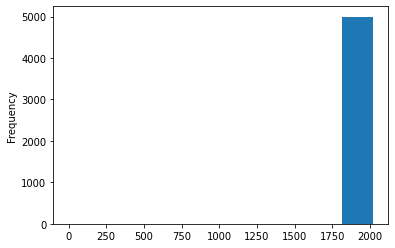

In [22]:
df.Year_Built.plot.hist()

In [23]:
# Fix the zero values
df['Year_Built'] = df.Year_Built.replace(0, 1999)

In [24]:
df['Lot_Size'].describe()

count    4990.000000
mean        4.661317
std        51.685230
min         0.000000
25%         0.580000
50%         0.990000
75%         1.757500
max      2154.000000
Name: Lot_Size, dtype: float64

In [25]:
df['Lot_Size'] = df['Lot_Size'].fillna(1)

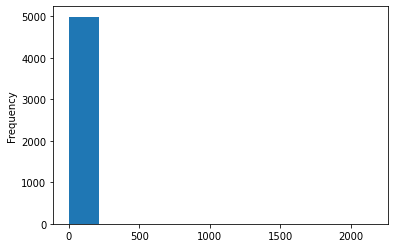

In [26]:
df.Lot_Size.plot.hist()

In [27]:
df['Lot_Size'] = df.Lot_Size.replace(0, 1)

In [28]:
# Make sure all missing values are filled
missing_values = {}
for missing in df.columns:
  none_values = df[df[missing] == 'None'].shape
  missing_values[missing]= none_values[0]
missing_values

{'Bathrooms': 0,
 'Bedrooms': 0,
 'Garage': 0,
 'HOA': 0,
 'Latitude': 0,
 'Longitude': 0,
 'Lot_Size': 0,
 'Price_of_House': 0,
 'Square_Footage': 0,
 'Taxes': 0,
 'Year_Built': 0,
 'Zip_Code': 0}

## Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


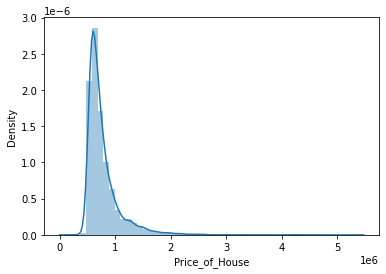

In [29]:
'''
Plot the boxplot
Create a threshold for each column
remove the values that are above or below the threshold
'''

sns.distplot(df['Price_of_House'])

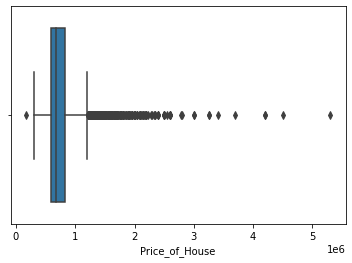

In [30]:
sns.boxplot(x=df['Price_of_House'])

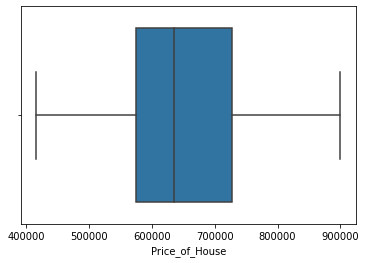

In [31]:
df = df.drop(df[df['Price_of_House'].values >= 900000].index)
df = df.drop(df[df['Price_of_House'].values <= 400000].index)
sns.boxplot(x=df['Price_of_House'])

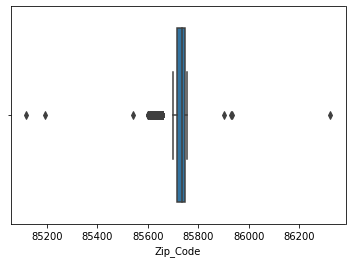

In [32]:
sns.boxplot(x=df['Zip_Code'])

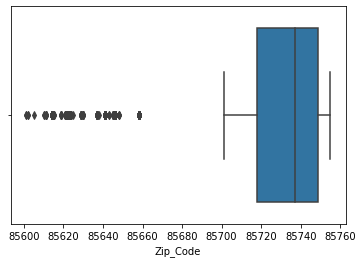

In [33]:
df = df.drop(df[df['Zip_Code'].values < 85600].index)
df = df.drop(df[df['Zip_Code'].values > 85800].index)
sns.boxplot(x=df['Zip_Code'])

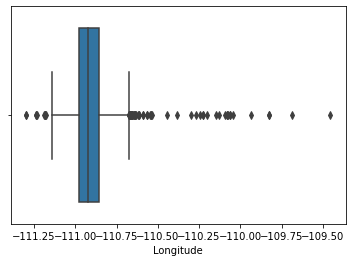

In [34]:
sns.boxplot(x=df['Longitude'])

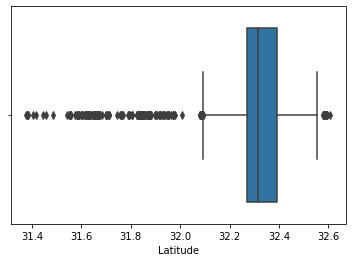

In [35]:
sns.boxplot(x=df['Latitude'])

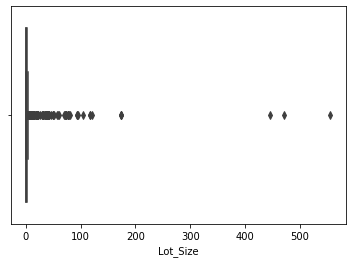

In [36]:
sns.boxplot(x=df['Lot_Size'])

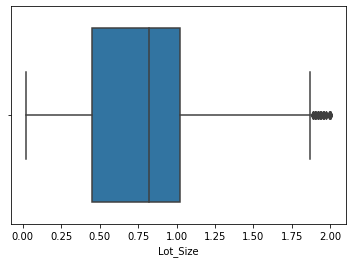

In [37]:
df = df.drop(df[df['Lot_Size'].values > 2].index)
df = df.drop(df[df['Lot_Size'].values <= 0].index)
sns.boxplot(x=df['Lot_Size'])

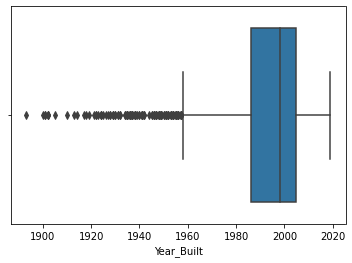

In [38]:
sns.boxplot(x=df['Year_Built'])

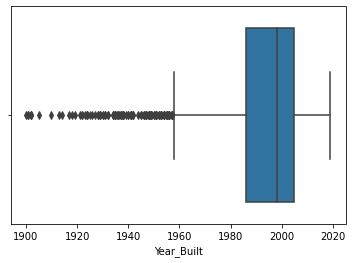

In [39]:
df = df.drop(df[df['Year_Built'] < 1900].index)
sns.boxplot(x=df['Year_Built'])

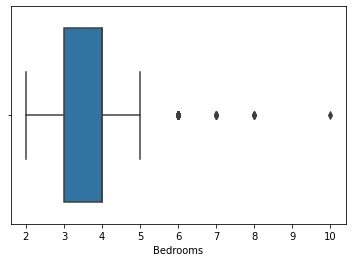

In [40]:
sns.boxplot(x=df['Bedrooms'])

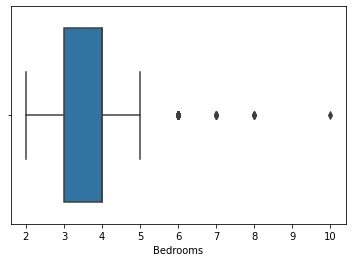

In [41]:
df = df.drop(df[df['Bedrooms'] > 10].index)
sns.boxplot(x=df['Bedrooms'])

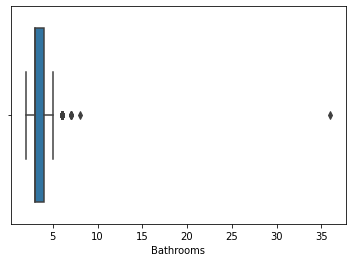

In [42]:
sns.boxplot(x=df['Bathrooms'])

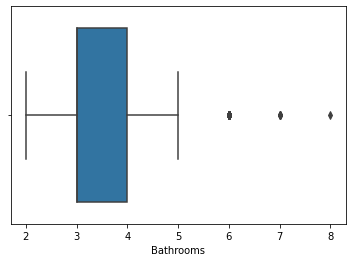

In [43]:
df = df.drop(df[df['Bathrooms'] > 10].index)
sns.boxplot(x=df['Bathrooms'])

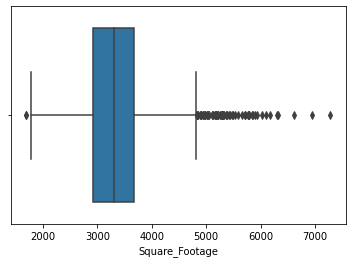

In [44]:
sns.boxplot(x=df['Square_Footage'])

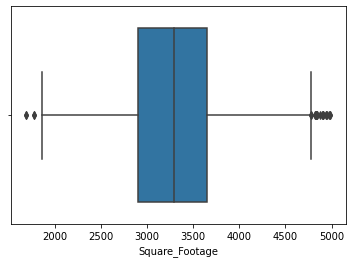

In [45]:
df  = df.drop(df[df['Square_Footage'] > 5000].index)
sns.boxplot(x=df['Square_Footage'])

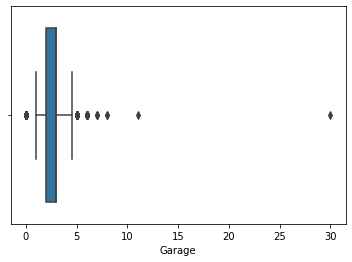

In [46]:
sns.boxplot(x=df['Garage'])

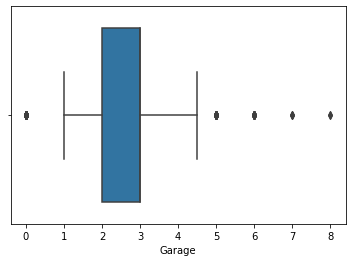

In [47]:
df = df.drop(df[df['Garage'] > 10].index)
sns.boxplot(x=df['Garage'])

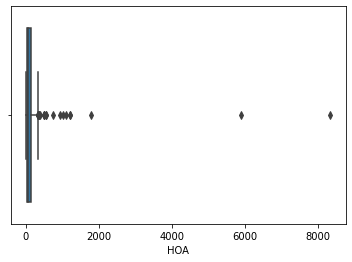

In [48]:
sns.boxplot(x=df['HOA'])

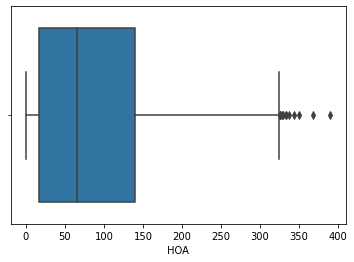

In [49]:
df = df.drop(df[df['HOA'] > 400].index)
sns.boxplot(x=df['HOA'])

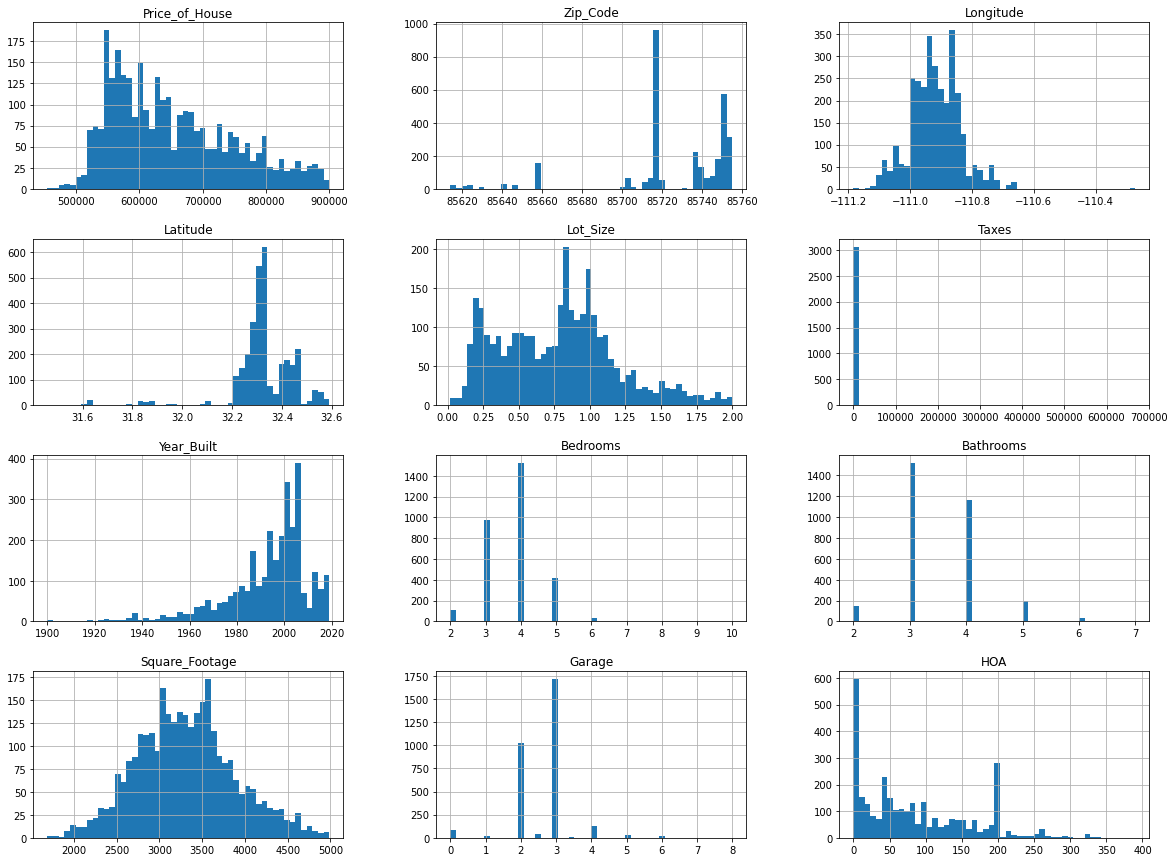

In [50]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Important Features


In [51]:
# Create a copy of the dataframe and engineer two new columns Price/SquareFootage and Bedrooms/bathrooms

df2 = df.copy()
df2['Price_per_Square_Footage'] = df['Price_of_House']/df['Square_Footage']
df2['Bedrooms_to_Bathrooms_ratio'] = df['Bedrooms']/df['Bathrooms']
df2 = df2.drop(['Price_of_House', 'Square_Footage', 'Bathrooms', 'Bedrooms'], axis=1)
df2.reset_index(drop=True, inplace=True)
df2

,Zip_Code,Longitude,Latitude,Lot_Size,Taxes,Year_Built,Garage,HOA,Price_per_Square_Footage,Bedrooms_to_Bathrooms_ratio
0,85750,-110.872460,32.313232,1.95,12497.67,2007,4.0,44.00,181.052632,1.000000
1,85718,-110.940620,32.347876,1.23,11318.66,2004,3.0,160.00,214.820179,0.800000
2,85718,-110.920262,32.297649,1.02,6556.00,1994,3.0,133.00,234.260615,0.600000
3,85750,-110.851950,32.276550,1.00,5812.86,2001,3.0,0.00,191.451469,1.000000
4,85750,-110.825405,32.282552,0.82,7148.88,2003,3.0,110.00,240.252608,1.000000
...,...,...,...,...,...,...,...,...,...,...
3061,85622,-111.038888,31.791324,0.95,3919.93,2010,3.0,78.65,149.487472,1.000000
3062,85750,-110.820216,32.307646,0.83,4568.71,1986,2.0,6.00,200.853182,1.333333
3063,85718,-110.922291,32.317496,0.18,4414.00,2002,2.0,198.00,254.036087,1.500000
3064,85750,-110.858556,32.316373,1.42,4822.01,1990,3.0,43.00,237.273512,1.333333


In [52]:
df.reset_index(drop=True, inplace=True)
df

,Price_of_House,Zip_Code,Longitude,Latitude,Lot_Size,Taxes,Year_Built,Bedrooms,Bathrooms,Square_Footage,Garage,HOA
0,860000.0,85750,-110.872460,32.313232,1.95,12497.67,2007,5,5.0,4750.0,4.0,44.00
1,890000.0,85718,-110.940620,32.347876,1.23,11318.66,2004,4,5.0,4143.0,3.0,160.00
2,800000.0,85718,-110.920262,32.297649,1.02,6556.00,1994,3,5.0,3415.0,3.0,133.00
3,860000.0,85750,-110.851950,32.276550,1.00,5812.86,2001,4,4.0,4492.0,3.0,0.00
4,875000.0,85750,-110.825405,32.282552,0.82,7148.88,2003,4,4.0,3642.0,3.0,110.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3061,525000.0,85622,-111.038888,31.791324,0.95,3919.93,2010,3,3.0,3512.0,3.0,78.65
3062,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,6.00
3063,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,198.00
3064,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,43.00


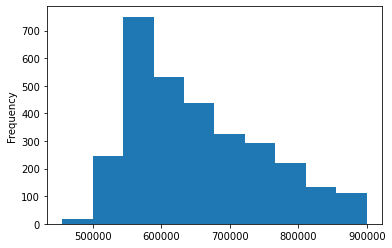

In [53]:
# Plot the features with respect to each other to determin the most important features

df.Price_of_House.plot.hist()

Text(0, 0.5, 'Price of House')

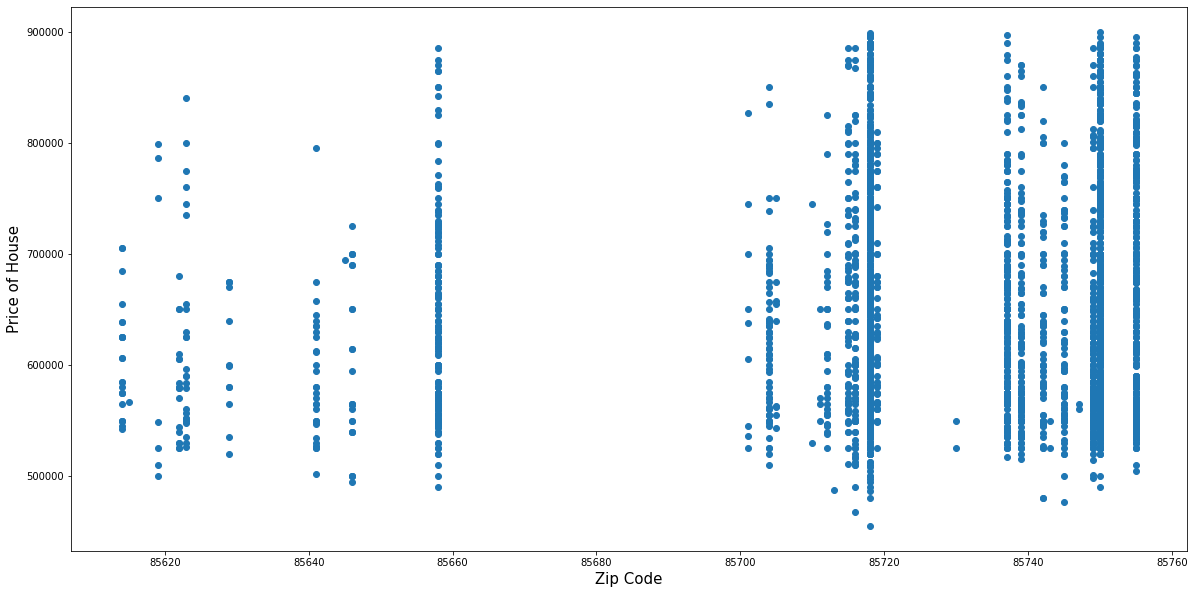

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(df['Zip_Code'], df['Price_of_House'])

plt.xlabel('Zip Code', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

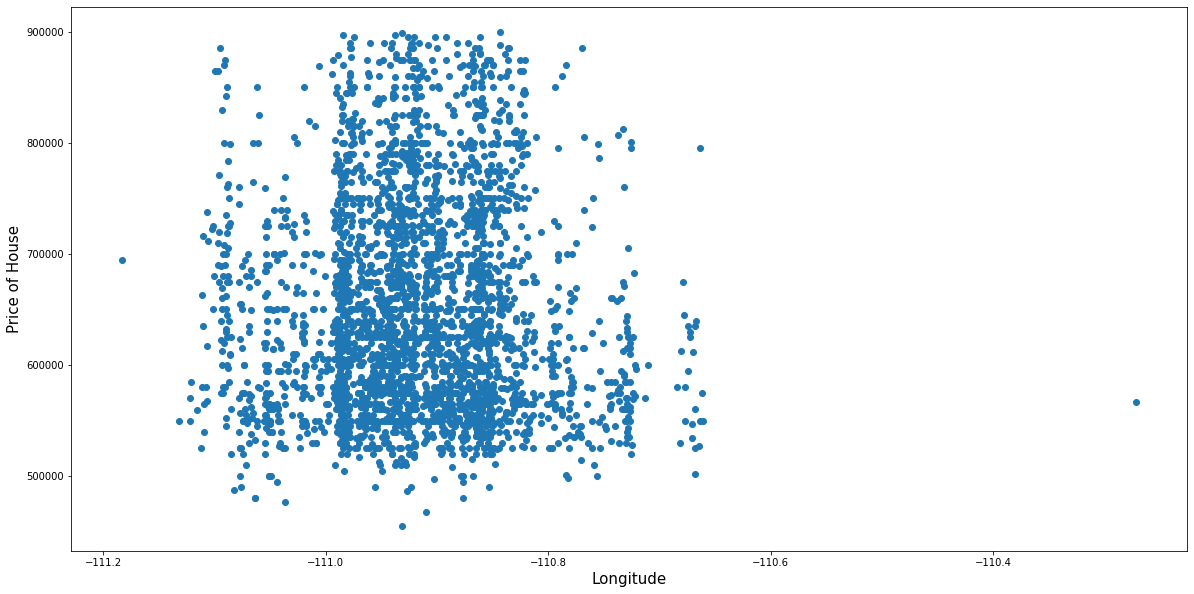

In [55]:
plt.figure(figsize=(20,10))
plt.scatter(df['Longitude'], df['Price_of_House'])
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

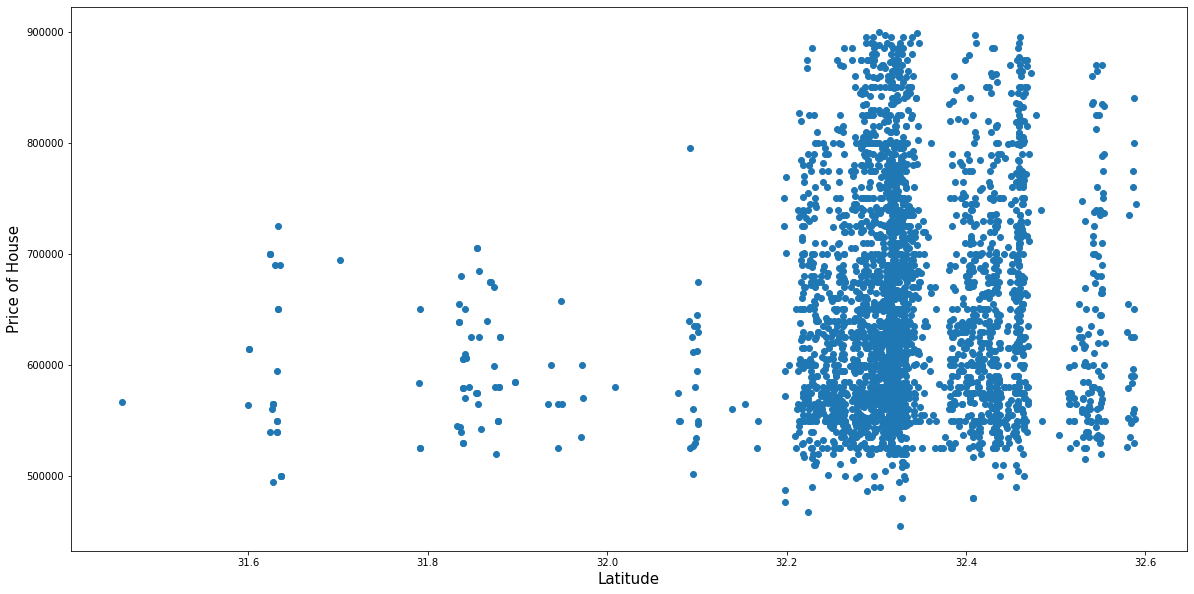

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(df['Latitude'], df['Price_of_House'])
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

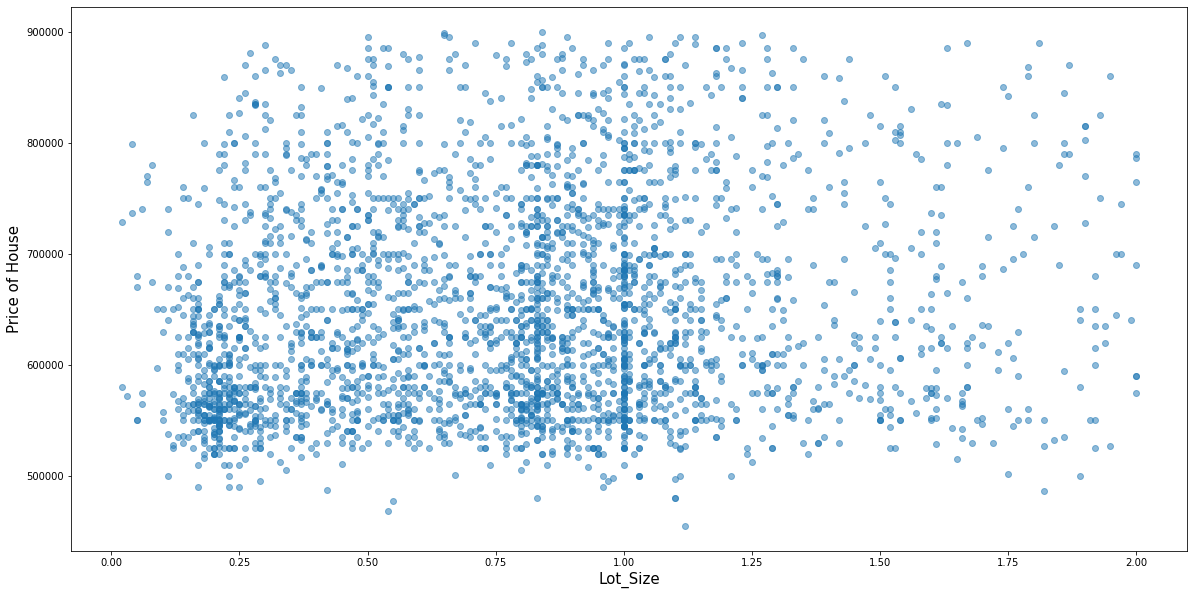

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(df['Lot_Size'], df['Price_of_House'], alpha=0.5)
plt.xlabel('Lot_Size', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

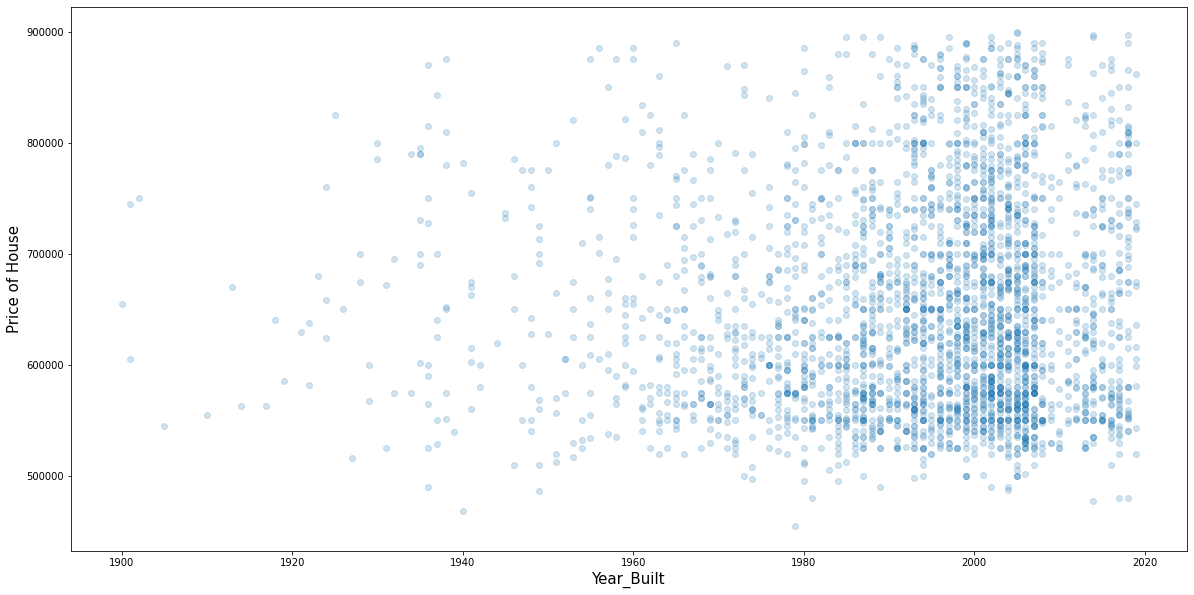

In [58]:
plt.figure(figsize=(20,10))
plt.scatter(df['Year_Built'], df['Price_of_House'], alpha=0.2)
plt.xlabel('Year_Built', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

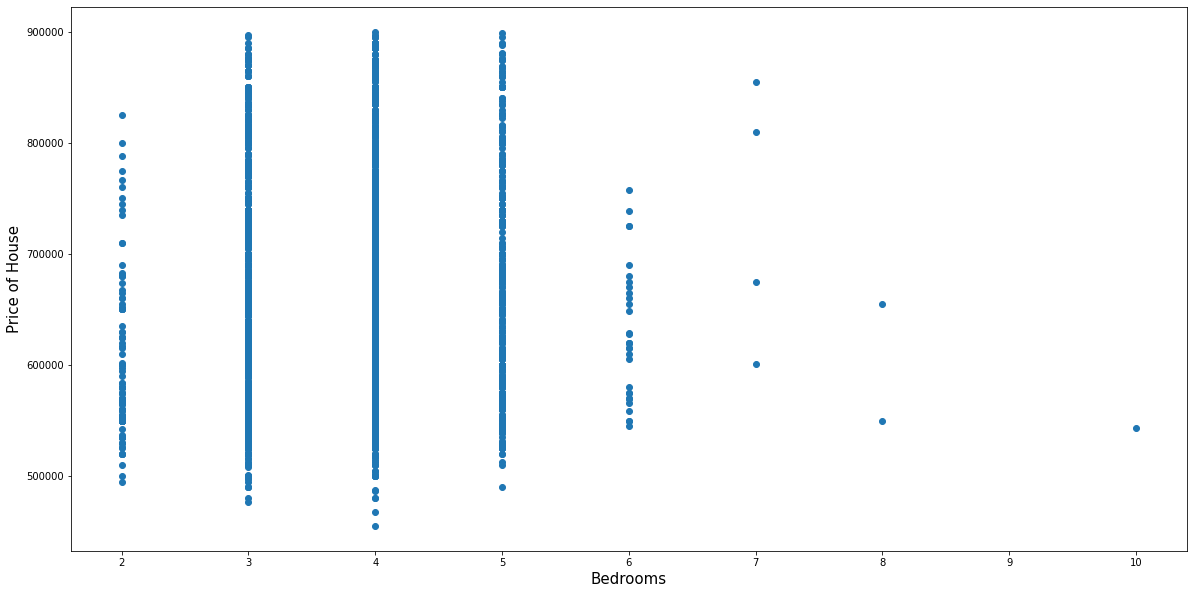

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(df['Bedrooms'], df['Price_of_House'])
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

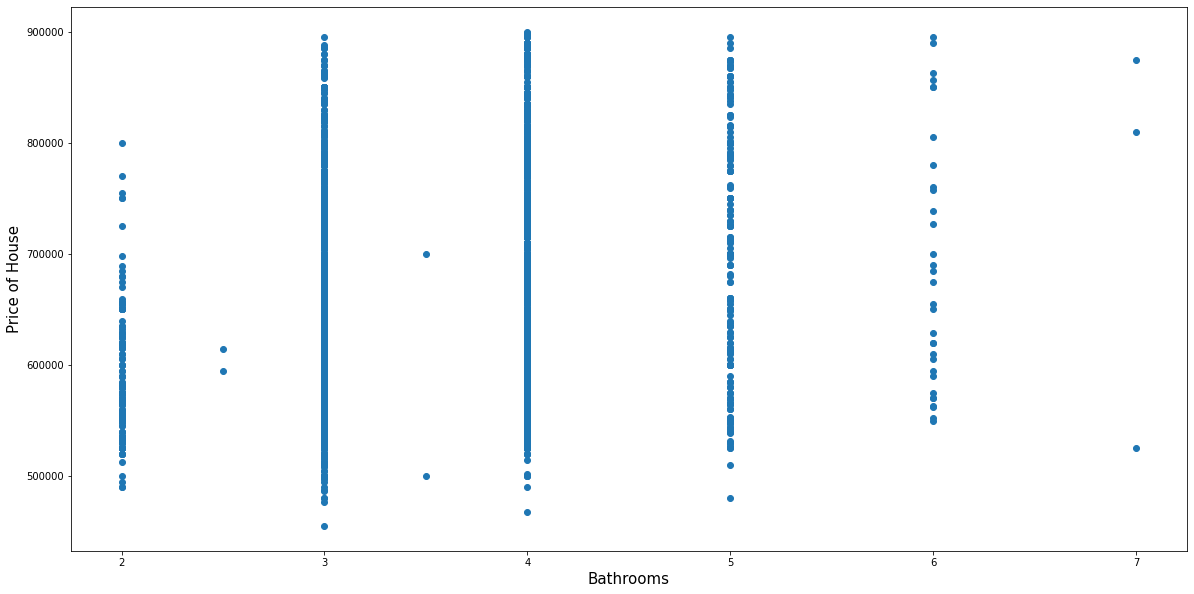

In [60]:
plt.figure(figsize=(20,10))
plt.scatter(df['Bathrooms'], df['Price_of_House'])
plt.xlabel('Bathrooms', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

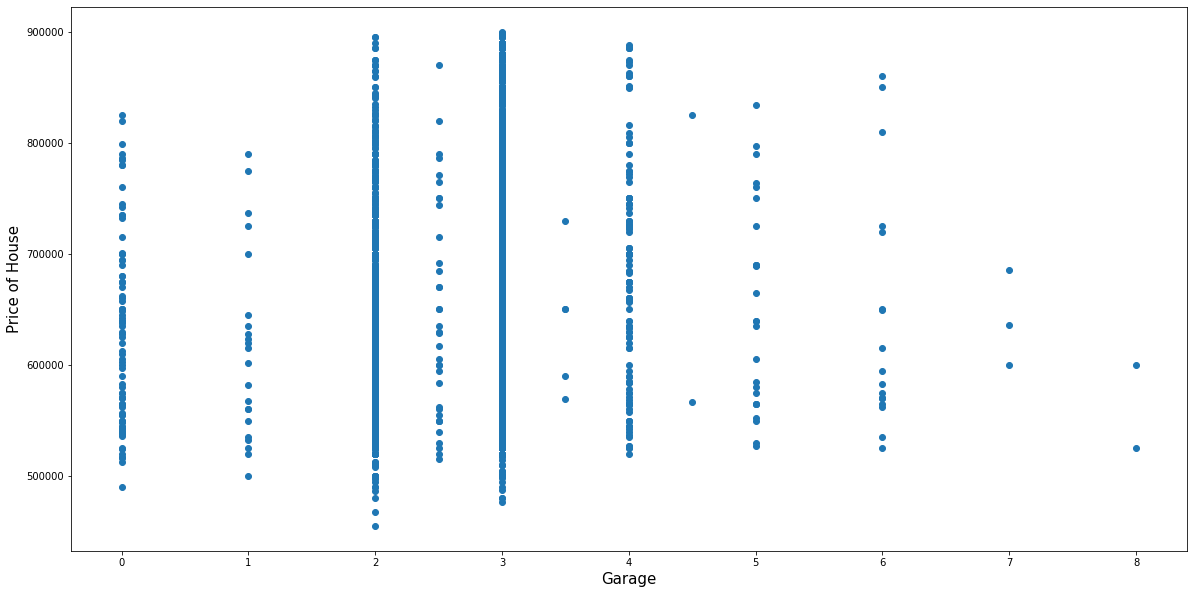

In [61]:
plt.figure(figsize=(20,10))
plt.scatter(df['Garage'], df['Price_of_House'])
plt.xlabel('Garage', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

Text(0, 0.5, 'Price of House')

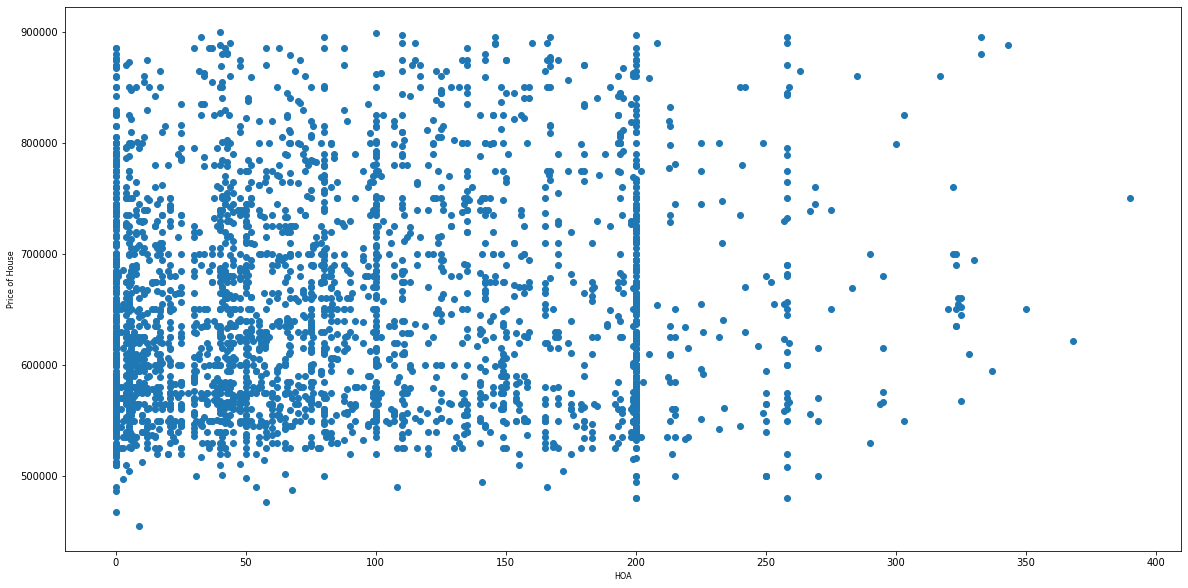

In [62]:
plt.figure(figsize=(20,10))
plt.scatter(df['HOA'], df['Price_of_House'])
plt.xlabel('HOA', fontsize=8)
plt.ylabel('Price of House', fontsize=8)

Text(0, 0.5, 'Price of House')

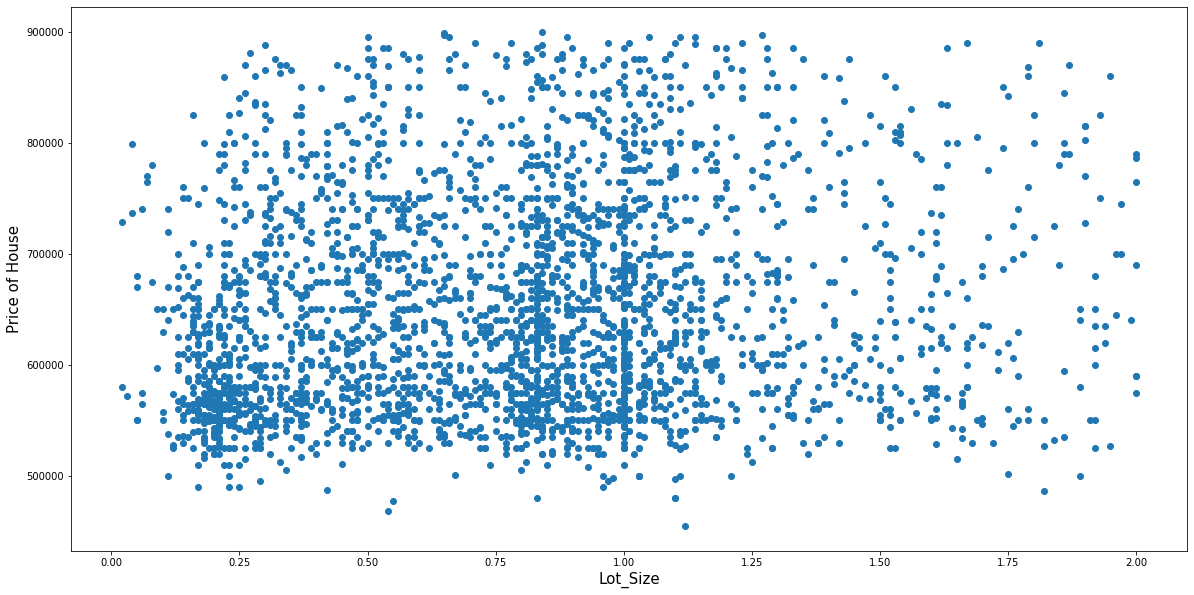

In [63]:
plt.figure(figsize=(20,10))
plt.scatter(df['Lot_Size'], df['Price_of_House'])
plt.xlabel('Lot_Size', fontsize=15)
plt.ylabel('Price of House', fontsize=15)

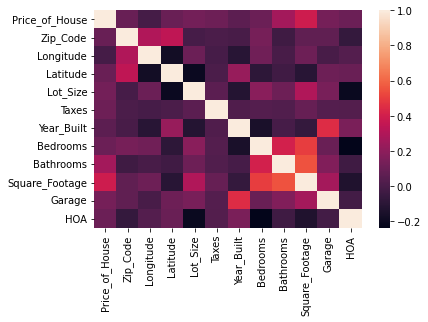

In [64]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

Text(0, 0.5, 'Price per Square Footage')

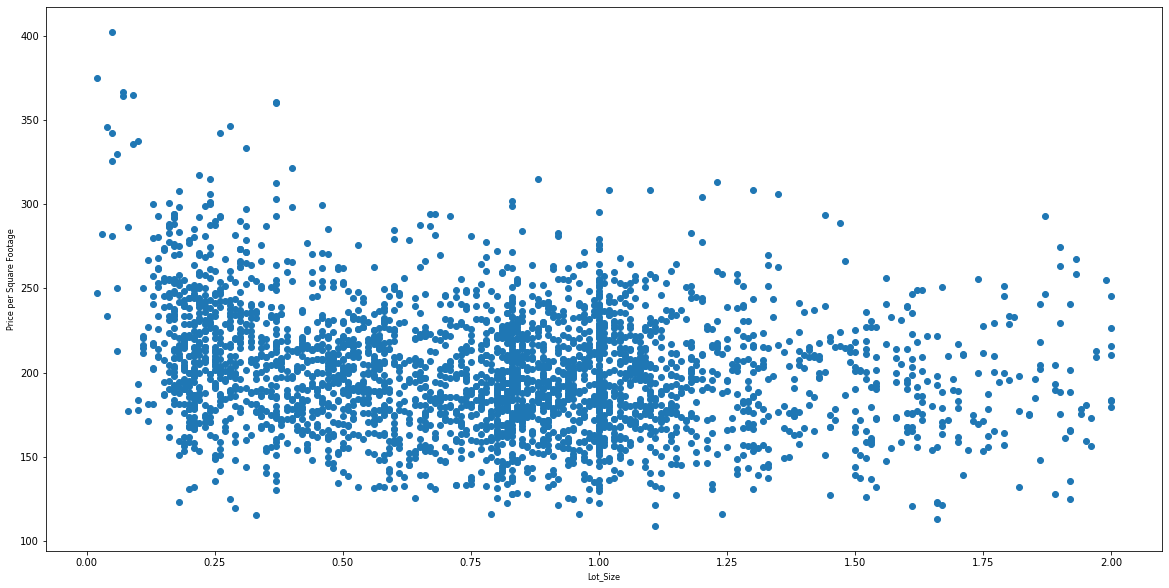

In [65]:
plt.figure(figsize=(20,10))
plt.scatter(df2['Lot_Size'], df2['Price_per_Square_Footage'])
plt.xlabel('Lot_Size', fontsize=8)
plt.ylabel('Price per Square Footage', fontsize=8)

Text(0, 0.5, 'Price per Square Footage')

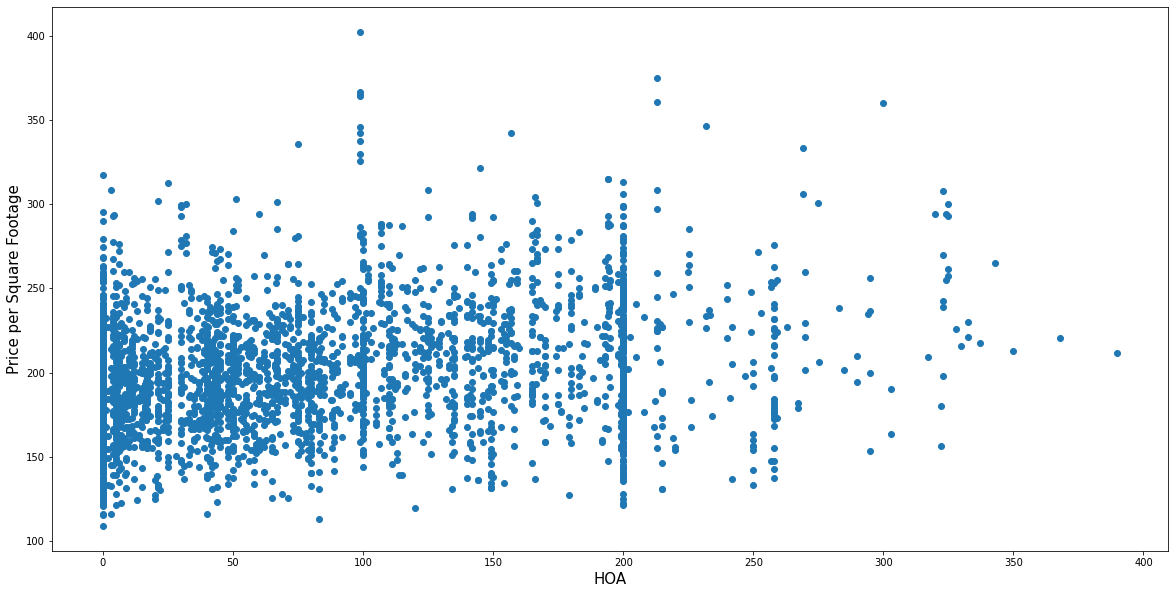

In [66]:
plt.figure(figsize=(20,10))
plt.scatter(df2['HOA'], df2['Price_per_Square_Footage'])
plt.xlabel('HOA', fontsize=15)
plt.ylabel('Price per Square Footage', fontsize=15)

Text(0, 0.5, 'Price per Square Footage')

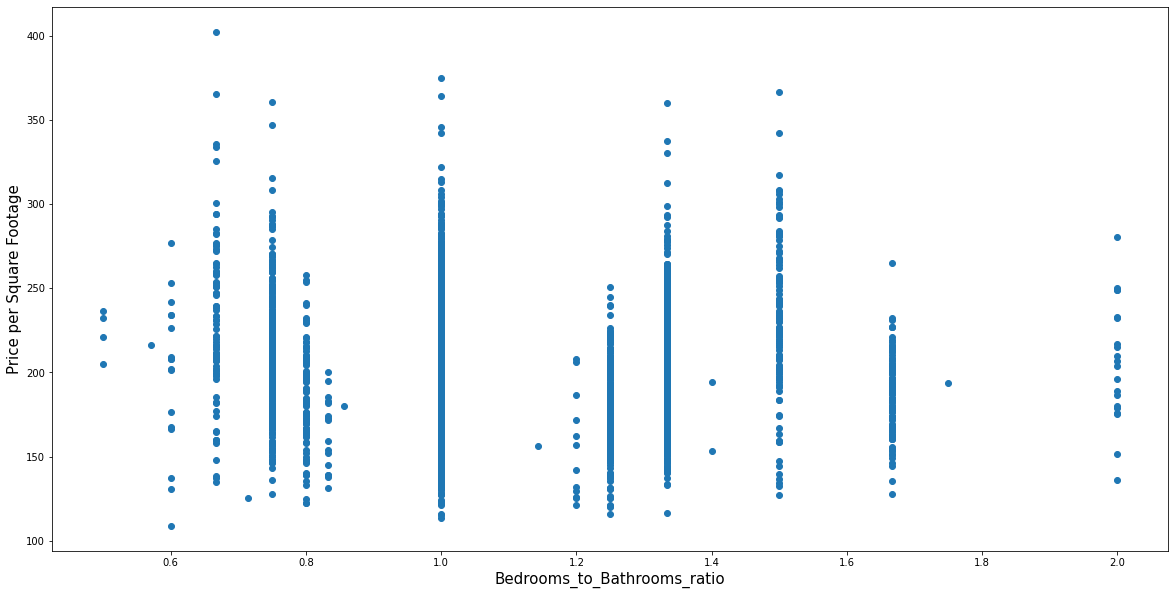

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(df2['Bedrooms_to_Bathrooms_ratio'], df2['Price_per_Square_Footage'])
plt.xlabel('Bedrooms_to_Bathrooms_ratio', fontsize=15)
plt.ylabel('Price per Square Footage', fontsize=15)

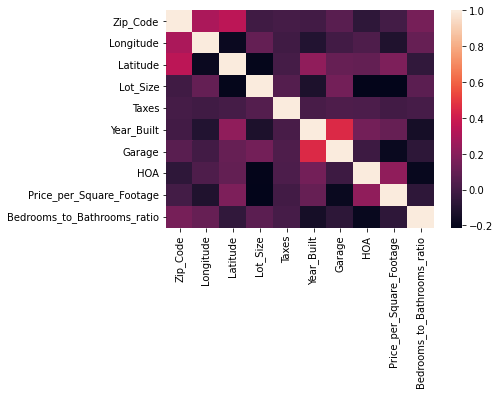

In [68]:
corr2_matrix = df2.corr()
sns.heatmap(corr2_matrix)

## Add the new feature 'Pools'


Text(0, 0.5, 'Latitude')

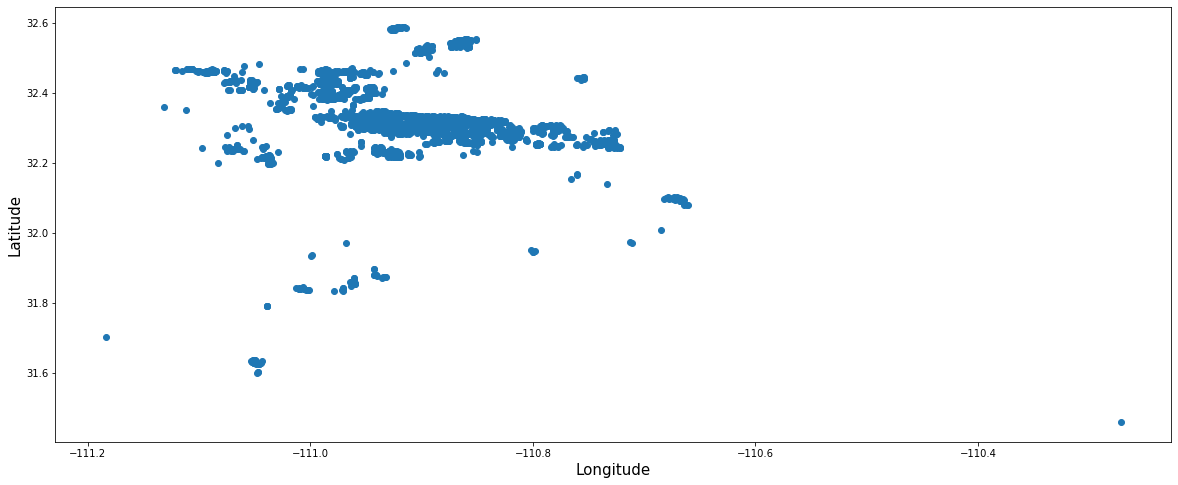

In [69]:
plt.figure(figsize=(20,8))
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude', size=15)
plt.ylabel('Latitude', size=15)

In [70]:
# Plot the houses with respect to the location on a map

fig = px.scatter_mapbox(df[(df['Longitude'] < -110.6) & (df['Longitude'] > -111.2)], 
                        lat = 'Latitude', lon = 'Longitude', color = 'Price_of_House',
                        center=dict(lon=-111, lat=32.37),
                       zoom = 10, mapbox_style = 'open-street-map')
fig

In [71]:
# Engineer a Pool feature in both the dataframes

df['Pool'], df2['Pool'] = 0, 0
df['Pool'] = np.where((df['Price_of_House'] > 150000) & (df['HOA'] > 100) & (df['Lot_Size'] > 0.25), 1, df['Pool'])
df2['Pool'] = np.where((df2['Price_per_Square_Footage'] > 100) & (df2['HOA'] > 100) & (df2['Lot_Size'] > 0.25), 1, df2['Pool'])
df[df['Pool'] == 1].shape, df2[df2['Pool'] == 1].shape

((791, 13), (791, 11))

In [72]:
# Plot the houses with respect to Pool availabilty on a map

fig = px.scatter_mapbox(df[(df['Longitude'] < -110.6) & (df['Longitude'] > -111.2)], 
                        lat = 'Latitude', lon = 'Longitude', color = 'Pool', opacity = 0.4,
                        color_continuous_scale='bluered', center=dict(lon=-111, lat=32.37),
                       zoom = 10, mapbox_style = 'open-street-map')
fig

In [73]:
fig = px.scatter_mapbox(df[(df2['Longitude'] < -110.6) & (df2['Longitude'] > -111.2)], 
                        lat = 'Latitude', lon = 'Longitude',color = 'Pool', opacity = 0.5,
                        center=dict(lon=-111, lat=32.37),
                       zoom = 10, mapbox_style = 'open-street-map')
fig

## Trainning and Testing the Model

In [74]:
df.shape

(3066, 13)

In [75]:
# Create a function that splits the dataset

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [76]:
# Split the first data frame into train, test and validation

df_with_id = df.reset_index()
train, test = split_train_test_by_id(df_with_id, 0.15, 'index')
validate = train.sample(frac=.1175)
train = train.drop(validate.index)
train.shape,test.shape, validate.shape

train = train.drop(['index'], axis=1)
validate = validate.drop(['index'], axis=1)
test = test.drop(['index'], axis=1)

train.shape,validate.shape,test.shape

((2300, 13), (306, 13), (460, 13))

In [77]:
# Use the important features of the data frame

train = train[['Price_of_House','Lot_Size', 'HOA', 'Pool']]
validate = validate[['Price_of_House','Lot_Size', 'HOA', 'Pool']]
test = test[['Price_of_House','Lot_Size', 'HOA', 'Pool']]

In [78]:
# Split the second data frame into train2, test2 and validation2

df2_with_id = df2.reset_index()
train2, test2 = split_train_test_by_id(df2_with_id, 0.15, 'index')
validate2 = train2.sample(frac=.1175)
train2 = train2.drop(validate2.index)

train2 = train2.drop(['index'], axis=1)
validate2 = validate2.drop(['index'], axis=1)
test2 = test2.drop(['index'], axis=1)

In [79]:
# Use the important features of the data frame

train2 = train2[['Price_per_Square_Footage','Lot_Size', 'HOA', 'Pool']]
validate2 = validate2[['Price_per_Square_Footage','Lot_Size', 'HOA', 'Pool']]
test2 = test2[['Price_per_Square_Footage','Lot_Size', 'HOA', 'Pool']]
train2.shape,validate2.shape,test2.shape

((2300, 4), (306, 4), (460, 4))

In [80]:
# Use the K Nearest Neighbor Classifier for both Data

class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y
  
  def predict(self, X, K, epsilon=1e-2):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]              ## sorts the array dist2 from closest to farthest and [:K] is the K nearest values
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [81]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [82]:
# Create the label (y) which is the pool feature and X which is the important features

X_train = train.to_numpy()
y_train = X_train[:,-1]
X_train = X_train[:,:-1]

X_validate = validate.to_numpy()
y_validate = X_validate[:,-1]
X_validate = X_validate[:,:-1]

X_test = test.to_numpy()
y_test = X_test[:,-1]
X_test = X_test[:,:-1]

In [83]:
# Create the label (y) which is the pool feature and X which is the important features

X_train2 = train2.to_numpy()
y_train2 = X_train2[:,-1]
X_train2 = X_train2[:,:-1]

X_validate2 = validate2.to_numpy()
y_validate2 = X_validate2[:,-1]
X_validate2= X_validate2[:,:-1]

X_test2 = test2.to_numpy()
y_test2 = X_test2[:,-1]
X_test2 = X_test2[:,:-1]

In [84]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_validate = y_validate.astype(int)

In [85]:
y_train2 = y_train2.astype(int)
y_test2 = y_test2.astype(int)
y_validate2 = y_validate2.astype(int)

In [86]:
# Train the data inside the KNN Classifier and fit the values of X_train and y_train
# Validate the trainning by using the validation data to predicte and find the accuracy

trainning = KNNClassifier()
trainning.fit(X_train, y_train)
y_hat_validate = trainning.predict(X_validate, 30)
print(accuracy(y_validate, y_hat_validate))

0.8169934640522876


In [87]:
# Find the accuracy of the first data test

y_hat_test = trainning.predict(X_test, 30)
print(accuracy(y_test, y_hat_test))

0.8130434782608695


In [88]:
# Train the data inside the KNN Classifier and fit the values of X_train and y_train
# Validate the trainning by using the validation data to predicte and find the accuracy

trainning2 = KNNClassifier()
trainning2.fit(X_train2, y_train2)
y_hat_validate2 = trainning2.predict(X_validate2, 30)
print(accuracy(y_validate2, y_hat_validate2))

0.9248366013071896


In [89]:
# Find the accuracy of the second data test

y_hat_test2 = trainning2.predict(X_test2, 30)
print(accuracy(y_test2, y_hat_test2))

0.9065217391304348


## Confusion Matrix

Text(0.5, 42.0, 'Predicted label')

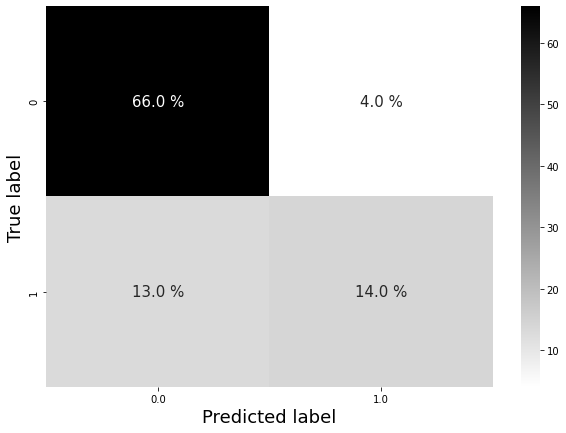

In [90]:
from re import X
# Condusion Matrix of the validation of the first data frame

plt.figure(figsize=(10,7))
y_actu = pd.Series(y_validate, name='Actual')
y_pred = pd.Series(y_hat_validate, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)

x= 0
y = 0
for i in cm:
  x+=cm[i][1]
  y+=cm[i][0]
for j in cm:
  cm[j][0] = (float(cm[j][0])/float(x+y))*100
  cm[j][1] = (float(cm[j][1])/float(x+y))*100

ax = sns.heatmap((cm), annot=True, cmap="gist_gray_r",fmt='.1f', annot_kws={"size":15})
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label',fontsize=18)

Text(0.5, 42.0, 'Predicted label')

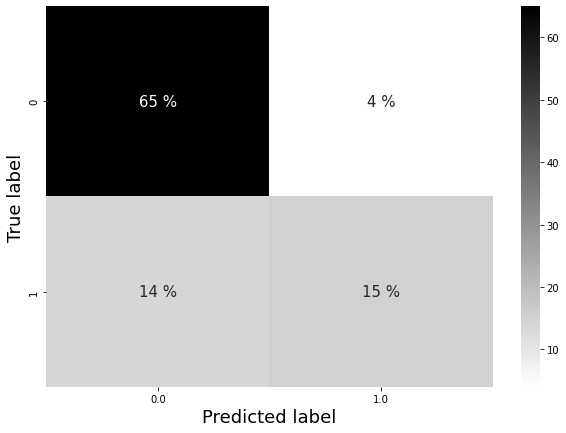

In [91]:
# Condusion Matrix of the test of the first data frame

plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
x= 0
y = 0
for i in cm:
  x+=cm[i][1]
  y+=cm[i][0]
for j in cm:
  cm[j][0] = (float(cm[j][0])/float(x+y))*100
  cm[j][1] = (float(cm[j][1])/float(x+y))*100
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r",annot_kws={"size":15})
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label',fontsize=18)

Text(0.5, 42.0, 'Predicted label')

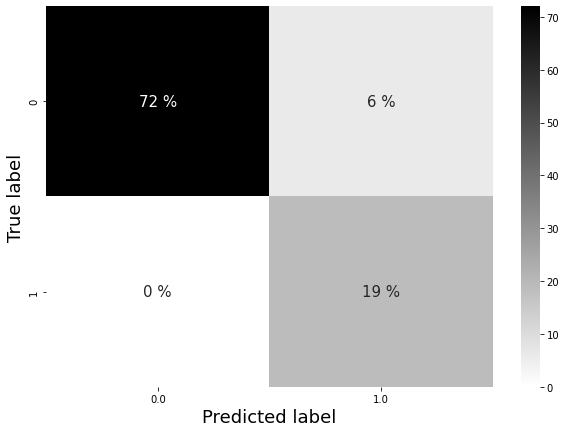

In [92]:
# Condusion Matrix of the validation of the second data frame

plt.figure(figsize=(10,7))
y_actu2 = pd.Series(y_validate2, name='Actual')
y_pred2 = pd.Series(y_hat_validate2, name='Predicted')
cm = pd.crosstab(y_actu2, y_pred2)
x= 0
y = 0
for i in cm:
  x+=cm[i][1]
  y+=cm[i][0]
for j in cm:
  cm[j][0] = (float(cm[j][0])/float(x+y))*100
  cm[j][1] = (float(cm[j][1])/float(x+y))*100
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r",annot_kws={"size":15})
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label',fontsize=18)

Text(0.5, 24.0, 'Predicted label')

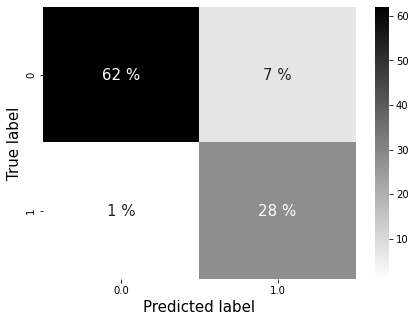

In [93]:
# Condusion Matrix of the test of the second data frame

plt.figure(figsize=(7,5))
y_actu2 = pd.Series(y_test2, name='Actual')
y_pred2 = pd.Series(y_hat_test2, name='Predicted')
cm = pd.crosstab(y_actu2, y_pred2)
x= 0
y = 0
for i in cm:
  x+=cm[i][1]
  y+=cm[i][0]
for j in cm:
  cm[j][0] = (float(cm[j][0])/float(x+y))*100
  cm[j][1] = (float(cm[j][1])/float(x+y))*100
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r", annot_kws={"size":15})
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label',fontsize=15)

## Accuracy, Preceison and Recall

In [94]:
# Function created to calculate the true positives and negatives as well as the false positives and negatives
# Functions created to calculate the accuracy, precision and recall of both data frames

def confusion_values(y_actu, y_pred):
  tn = sum((y_actu == 0) & (y_pred == 0))
  tp = sum((y_actu == 1) & (y_pred == 1))
  fn = sum((y_actu == 1) & (y_pred == 0))
  fp = sum((y_actu == 0) & (y_pred == 1))

  return tn, tp, fn, fp

def calculate_accuracy(tp, tn, fn,fp):
  return ((tp+tn)*100)/float(tp+tn+fn+fp)

def Precision(tp, fp):
  return (tp * 100)/float(tp + fp)

def Recall(tp, fn):
  return (tp*100)/float(tp+fn)

In [95]:
tn, tp, fn, fp = confusion_values(y_actu, y_pred)
tn2, tp2, fn2, fp2 =  confusion_values(y_actu2, y_pred2)
tn, tp, fn, fp, tn2, tp2, fn2, fp2

(303, 71, 67, 19, 288, 129, 9, 34)

In [96]:
acc = calculate_accuracy(tp, tn, fn,fp)
acc2 = calculate_accuracy(tp2, tn2, fn2,fp2)
acc, acc2

(81.30434782608695, 90.65217391304348)

In [97]:
tn, tp, fn, fp, tn2, tp2, fn2, fp2

(303, 71, 67, 19, 288, 129, 9, 34)

In [98]:
precision = Precision(tp, fp)
precision2 = Precision(tp2, fp2)
precision, precision2

(78.88888888888889, 79.14110429447852)

In [99]:
recall = Recall(tp, fn)
recall2 = Recall(tp2, fn2)
recall, recall2

(51.44927536231884, 93.47826086956522)

## Demo Version


In [100]:
df2

,Zip_Code,Longitude,Latitude,Lot_Size,Taxes,Year_Built,Garage,HOA,Price_per_Square_Footage,Bedrooms_to_Bathrooms_ratio,Pool
0,85750,-110.872460,32.313232,1.95,12497.67,2007,4.0,44.00,181.052632,1.000000,0
1,85718,-110.940620,32.347876,1.23,11318.66,2004,3.0,160.00,214.820179,0.800000,1
2,85718,-110.920262,32.297649,1.02,6556.00,1994,3.0,133.00,234.260615,0.600000,1
3,85750,-110.851950,32.276550,1.00,5812.86,2001,3.0,0.00,191.451469,1.000000,0
4,85750,-110.825405,32.282552,0.82,7148.88,2003,3.0,110.00,240.252608,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
3061,85622,-111.038888,31.791324,0.95,3919.93,2010,3.0,78.65,149.487472,1.000000,0
3062,85750,-110.820216,32.307646,0.83,4568.71,1986,2.0,6.00,200.853182,1.333333,0
3063,85718,-110.922291,32.317496,0.18,4414.00,2002,2.0,198.00,254.036087,1.500000,0
3064,85750,-110.858556,32.316373,1.42,4822.01,1990,3.0,43.00,237.273512,1.333333,0


In [101]:
test2

,Price_per_Square_Footage,Lot_Size,HOA,Pool
16,212.740092,0.87,167.0,1
23,211.834320,1.14,146.0,1
25,304.453723,1.20,166.0,1
30,270.018622,0.69,114.0,1
35,246.999721,0.90,88.0,0
...,...,...,...,...
3022,136.432542,0.75,144.0,1
3026,194.384449,0.88,0.0,0
3046,144.205558,1.50,200.0,1
3059,199.179411,0.29,180.0,1


In [120]:
df2[df2['HOA'] >]

,Zip_Code,Longitude,Latitude,Lot_Size,Taxes,Year_Built,Garage,HOA,Price_per_Square_Footage,Bedrooms_to_Bathrooms_ratio,Pool
0,85750,-110.872460,32.313232,1.95,12497.67,2007,4.0,44.00,181.052632,1.000000,0
1,85718,-110.940620,32.347876,1.23,11318.66,2004,3.0,160.00,214.820179,0.800000,1
2,85718,-110.920262,32.297649,1.02,6556.00,1994,3.0,133.00,234.260615,0.600000,1
3,85750,-110.851950,32.276550,1.00,5812.86,2001,3.0,0.00,191.451469,1.000000,0
4,85750,-110.825405,32.282552,0.82,7148.88,2003,3.0,110.00,240.252608,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
3061,85622,-111.038888,31.791324,0.95,3919.93,2010,3.0,78.65,149.487472,1.000000,0
3062,85750,-110.820216,32.307646,0.83,4568.71,1986,2.0,6.00,200.853182,1.333333,0
3063,85718,-110.922291,32.317496,0.18,4414.00,2002,2.0,198.00,254.036087,1.500000,0
3064,85750,-110.858556,32.316373,1.42,4822.01,1990,3.0,43.00,237.273512,1.333333,0


In [109]:
n = int(input('Insert the data length: '))
X_demo = np.zeros((n,3))
for i in range(n):
    X_demo[i][0]=(float(input('Input the price per square footage (0-300): ')))
    X_demo[i][1]=(float(input('Input the lot size (0-1.5): ')))
    X_demo[i][2]=(float(input('Input the HOA price (0-350): ')))

Insert the data length: 2
Input the price per square footage: 100
Input the lot size: 0.25
Input the HOA price: 100
Input the price per square footage: 500
Input the lot size: 1
Input the HOA price: 300


In [110]:
y_hat_demo = trainning2.predict(X_demo, 15)
demo = pd.DataFrame(X_demo, columns=['Price_per_Square_Footage', 'Lot_Size', 'HOA'])

demo['Pool'] = y_hat_demo
demo

,Price_per_Square_Footage,Lot_Size,HOA,Pool
0,100.0,0.25,100.0,0.0
1,500.0,1.00,300.0,0.0
